In [1]:
### Getting to know the data
## Dev Notes:
## - loading all of MU.txt was causing python to crash due to what I can only assume were memory allocation problems
##   the dataset contains 40983 examples composed of 163932 rows of data
## - going to adopt progressive loading techniques to ensure that the all of the data that needs to be processed 
##   is processed. will test to see how much data my machine can handle at a given time.
## - had a brain fart before. the metadata and data split by tabs. I can use pandas and read in the original 
##   file as a tsv to split the metadata columns, then split the data columns using the python split function.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mne
%matplotlib inline

In [3]:
data = pd.read_csv("./MU.txt", sep="\t", header=None, names=["id", "event", "device", "channel", "code", "size", "data"], index_col=False);

In [4]:
data.head()

,id,event,device,channel,code,size,data
0,978111,132669,MU,TP9,6,459,"475,474,477,486,486,476,479,483,489,483,482,48..."
1,978112,132669,MU,FP1,6,459,"468,487,493,493,498,493,491,490,492,487,483,48..."
2,978113,132669,MU,FP2,6,459,"482,475,490,500,485,470,470,482,490,484,478,48..."
3,978114,132669,MU,TP10,6,459,"470,470,478,489,487,475,469,478,488,483,474,48..."
4,978115,132670,MU,TP9,7,493,"506,499,495,491,492,507,496,500,498,496,499,50..."


In [15]:
# splitting all 163932 rows of data using the split function is killing the kernel. will have to perform a progressive split of the data.
# want product of preprocessing to have a shape similar to a black and white image
# Example
# [[455, 456, 309...], -- TP9
# [502, 306, 599...],  -- FP1
# [502, 306, 599..],   -- FP2
# [502, 306, 599..]]   -- TP10

eegdata = {}
for i in range(0,40000):
    if data["event"][i] in eegdata:
        eegdata[data["event"][i]]["ch_names"].update({data["channel"][i]: [ int(x) for x in data["data"][i].split(",")]})
    else:
        eegdata[data["event"][i]]= {"ch_names": {data["channel"][i]: [ int(x) for x in data["data"][i].split(",")]}}
        eegdata[data["event"][i]].update({"code": data["code"][i]})
        eegdata[data["event"][i]].update({"size": data["size"][i]})

In [40]:
for i in list(eegdata.keys())[:10]:
    print(i)
    print(eegdata[i])

132669
{'ch_names': {'TP9': [475, 474, 477, 486, 486, 476, 479, 483, 489, 483, 482, 485, 486, 483, 474, 475, 484, 481, 482, 478, 476, 479, 487, 481, 480, 479, 487, 486, 471, 487, 491, 488, 491, 470, 460, 485, 484, 482, 485, 480, 487, 488, 479, 471, 479, 485, 484, 484, 478, 478, 479, 511, 524, 529, 530, 529, 525, 524, 533, 520, 516, 520, 525, 526, 521, 519, 526, 527, 529, 520, 520, 514, 522, 523, 514, 515, 517, 523, 517, 515, 528, 522, 530, 520, 519, 504, 532, 529, 528, 532, 523, 531, 524, 514, 522, 524, 524, 519, 516, 512, 519, 519, 526, 517, 519, 512, 523, 527, 518, 530, 529, 527, 524, 519, 522, 520, 516, 527, 525, 522, 528, 524, 518, 524, 530, 522, 518, 514, 518, 533, 521, 526, 527, 524, 524, 527, 512, 519, 520, 519, 515, 522, 535, 528, 528, 526, 526, 539, 528, 519, 528, 527, 523, 529, 519, 511, 524, 522, 525, 520, 515, 519, 522, 519, 517, 521, 528, 523, 527, 530, 515, 532, 526, 528, 518, 523, 535, 528, 524, 532, 529, 522, 519, 524, 532, 529, 523, 503, 513, 519, 516, 499, 513, 516, 5

In [42]:
example = eegdata[132678]["ch_names"]
example

{'FP1': [510,
  517,
  526,
  516,
  512,
  526,
  521,
  528,
  526,
  522,
  521,
  523,
  521,
  519,
  527,
  530,
  528,
  510,
  522,
  518,
  519,
  520,
  536,
  524,
  524,
  527,
  521,
  526,
  522,
  519,
  525,
  528,
  520,
  523,
  497,
  515,
  510,
  513,
  512,
  516,
  514,
  502,
  508,
  522,
  515,
  517,
  506,
  506,
  511,
  515,
  513,
  506,
  514,
  514,
  514,
  516,
  512,
  514,
  510,
  513,
  509,
  513,
  518,
  519,
  513,
  516,
  517,
  507,
  496,
  513,
  512,
  509,
  523,
  511,
  506,
  511,
  519,
  517,
  511,
  510,
  513,
  516,
  518,
  513,
  512,
  504,
  514,
  508,
  519,
  524,
  518,
  522,
  510,
  513,
  516,
  512,
  512,
  515,
  514,
  511,
  510,
  514,
  509,
  515,
  515,
  513,
  506,
  518,
  518,
  513,
  518,
  510,
  515,
  514,
  518,
  512,
  513,
  518,
  512,
  509,
  510,
  511,
  510,
  509,
  514,
  509,
  510,
  506,
  517,
  516,
  511,
  516,
  513,
  517,
  514,
  511,
  500,
  515,
  515,
  520,
  517,
  511,

In [49]:
## Visualizing the data
# ok time to show this data in a human readable way. all those numbers up there ^ mean absolutely nothing too me.
def visualize_event(data, event):
    example = data[event]["ch_names"]
    tp9 = pd.Series(example['TP9'])
    fp1 = pd.Series(example['FP1'])
    fp2 = pd.Series(example['FP2'])
    tp10 = pd.Series(example['TP10'])

    channel = []
    time = []
    voltage = []

    for ch in example.keys():
        for i in range(0,len(example[ch])):
            channel.append(ch)
            time.append(i)
            voltage.append(example[ch][i])

    df = pd.DataFrame({'channel': channel, 'time': time, 'voltage': voltage})

    df.head()

    by_channel = df.groupby('channel')

    for name, group in by_channel:
        plt.plot(group['time'], group['voltage'], label=name)

    plt.legend()
    plt.show()
    
    return data[event]["code"]

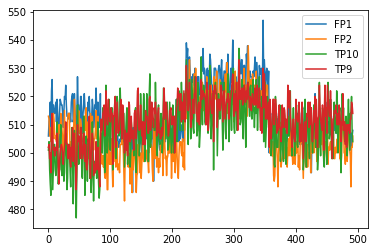

1

In [52]:
visualize_event(eegdata, 132673)